In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [5]:
df=pd.read_csv('Body.csv')

# See Data and its dimensions

In [6]:
df.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.50
3,1.55,55.84
4,1.57,58.00


In [7]:
df.shape

(31, 2)

In [8]:
df.tail()

,Height,Weight
26,1.81,62.00
27,1.70,65.90
28,1.79,80.65
29,1.80,71.00
30,1.81,74.50


In [12]:
df['Height'].head

<bound method NDFrame.head of 0     1.47
1     1.50
2     1.52
3     1.55
4     1.57
5     1.60
6     1.63
7     1.65
8     1.68
9     1.70
10    1.73
11    1.75
12    1.78
13    1.80
14    1.83
15    1.68
16    1.80
17    1.48
18    1.51
19    1.52
20    1.50
21    1.60
22    1.66
23    1.60
24    1.69
25    1.58
26    1.81
27    1.70
28    1.79
29    1.80
30    1.81
Name: Height, dtype: float64>

In [13]:
df['Weight'].head

<bound method NDFrame.head of 0     52.21
1     53.12
2     54.50
3     55.84
4     58.00
5     58.57
6     59.00
7     61.29
8     63.11
9     64.50
10    66.28
11    68.00
12    69.92
13    72.19
14    74.46
15    60.45
16    75.00
17    54.00
18    56.43
19    53.50
20    57.30
21    60.00
22    60.00
23    65.08
24    68.90
25    71.20
26    62.00
27    65.90
28    80.65
29    71.00
30    74.50
Name: Weight, dtype: float64>

# Check for null values

In [9]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [10]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Draw scatterplot

Text(0.5, 1.0, 'Height vs. Weight graph')

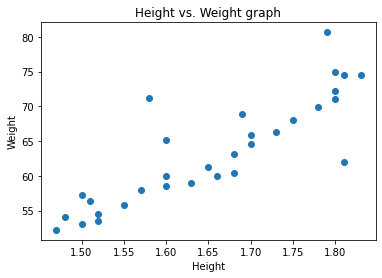

In [16]:
plt.scatter(df['Height'], df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight graph')

In [17]:
df.Height.mean()

1.654516129032258

In [18]:
df.Weight.mean()

63.448387096774205

# Train Test set split

In [19]:
x=df.drop('Weight', axis=1)

In [20]:
x.head()

,Height
0,1.47
1,1.50
2,1.52
3,1.55
4,1.57


In [24]:
y=df.drop('Height', axis=1)

In [25]:
y.head()

,Weight
0,52.21
1,53.12
2,54.50
3,55.84
4,58.00


In [26]:
y.shape

(31, 1)

In [27]:
from sklearn.model_selection import train_test_split as tts

In [33]:
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=0.3,random_state=43)

In [34]:
xtrain.shape

(21, 1)

In [35]:
ytrain.shape

(21, 1)

In [36]:
xtest.shape

(10, 1)

In [37]:
ytest.shape

(10, 1)

In [38]:
xtrain

,Height
5,1.60
24,1.69
27,1.70
23,1.60
22,1.66
15,1.68
1,1.50
11,1.75
18,1.51
3,1.55


In [39]:
ytrain

,Weight
5,58.57
24,68.90
27,65.90
23,65.08
22,60.00
15,60.45
1,53.12
11,68.00
18,56.43
3,55.84


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression as LR

In [41]:
reg=LR()

In [42]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [43]:
reg.coef_

array([[59.30810741]])

In [44]:
reg.intercept_

array([-34.96991135])

In [45]:
reg.predict([[1.55]])

array([[56.95765515]])

In [46]:
output=59.30810741*1.55-34.96991135

In [47]:
output

56.9576551355

In [50]:
ypred=reg.predict(xtest)

In [49]:
ytest

,Weight
25,71.20
12,69.92
13,72.19
6,59.00
7,61.29
8,63.11
10,66.28
20,57.30
9,64.50
30,74.50


In [51]:
ypred

array([[58.73689837],
       [70.59851985],
       [71.784682  ],
       [61.70230374],
       [62.88846589],
       [64.66770911],
       [67.63311448],
       [53.99224978],
       [65.85387126],
       [72.37776307]])

In [52]:
from sklearn.metrics import mean_squared_error as mse

In [53]:
mse(ytest, ypred)

18.73465578158983

# Best fit line

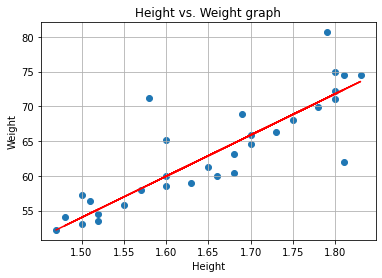

In [58]:
plt.plot(df.Height, reg.predict(x), color='red')
plt.scatter(df['Height'], df.Weight)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight graph')
plt.grid()